In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
# Load and preprocess the dataset
data = pd.read_csv('/Users/anjanhk/Downloads/Cotton Project/amazon.csv')

In [5]:
data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [8]:
data.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


In [9]:
data.shape

(1465, 16)

In [10]:
# Preprocess price columns
data['discounted_price'] = data['discounted_price'].replace('[₹,]', '', regex=True).astype(float)
data['actual_price'] = data['actual_price'].replace('[₹,]', '', regex=True).astype(float)
data['discount_percentage'] = data['discount_percentage'].replace('%', '', regex=True).astype(float)
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
data['rating_count'] = data['rating_count'].replace(',', '', regex=True).astype(float)

In [11]:
# Drop rows with missing values in critical columns
cleaned_data = data.dropna(subset=['discounted_price', 'actual_price', 'rating', 'rating_count', 'discount_percentage'])

In [12]:
# Ensure cleaned_data is a new DataFrame to avoid the SettingWithCopyWarning
cleaned_data = cleaned_data.copy()

In [14]:
# Adding engineered features with .loc to avoid warnings
cleaned_data.loc[:, 'discount_value'] = cleaned_data['actual_price'] - cleaned_data['discounted_price']
cleaned_data.loc[:, 'value_for_money'] = cleaned_data['rating'] * cleaned_data['discount_percentage']

In [15]:
# Define features and target
features = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'discount_value', 'value_for_money']
target = 'rating_count'

X = cleaned_data[features]
y = cleaned_data[target]

In [16]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [18]:
# Model 1: Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=200, max_depth=10)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

In [19]:
# Model 2: Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=200, learning_rate=0.1, max_depth=3)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)

In [21]:
# Print performance metrics
print("Random Forest - MSE:", rf_mse, "R2:", rf_r2)
print("\nGradient Boosting - MSE:", gb_mse, "R2:", gb_r2)

Random Forest - MSE: 2033831121.7832744 R2: 0.2273399715365051

Gradient Boosting - MSE: 2031581094.043417 R2: 0.22819476546649353


In [22]:
# Generate predictions and combine results into a DataFrame
results = pd.DataFrame({
    'Actual': y_test,
    'Random Forest Predicted': rf_pred,
    'Gradient Boosting Predicted': gb_pred
}).reset_index(drop=True)

print("Prediction Results:")
print(results.head())

Prediction Results:
    Actual  Random Forest Predicted  Gradient Boosting Predicted
0  24780.0             18276.727619                 14215.380007
1  15276.0             13216.550645                 10756.915881
2  83996.0              7578.385270                 25682.950562
3   2451.0             16654.871870                 16489.449173
4   6530.0             22099.407170                 13380.101958


In [23]:
# Save the results to a CSV file
results.to_csv('prediction_results.csv', index=False)

In [24]:
# Plot actual vs predicted for both models
plt.figure(figsize=(14, 7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

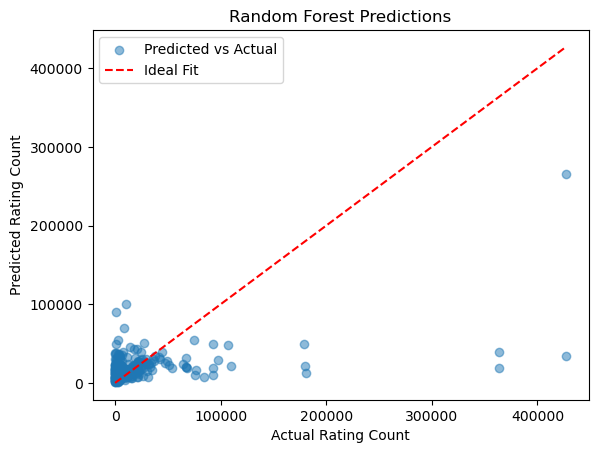

In [30]:
# Random Forest Plot
plt.subplot(1, 1, 1)
plt.scatter(y_test, rf_pred, alpha=0.5, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Rating Count')
plt.ylabel('Predicted Rating Count')
plt.title('Random Forest Predictions')
plt.legend()

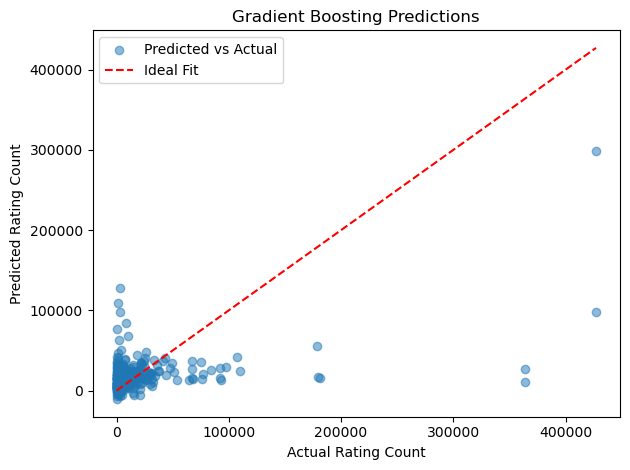

In [32]:
# Gradient Boosting Plot
plt.subplot(1, 1, 1)
plt.scatter(y_test, gb_pred, alpha=0.5, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Rating Count')
plt.ylabel('Predicted Rating Count')
plt.title('Gradient Boosting Predictions')
plt.legend()

plt.tight_layout()
plt.show()

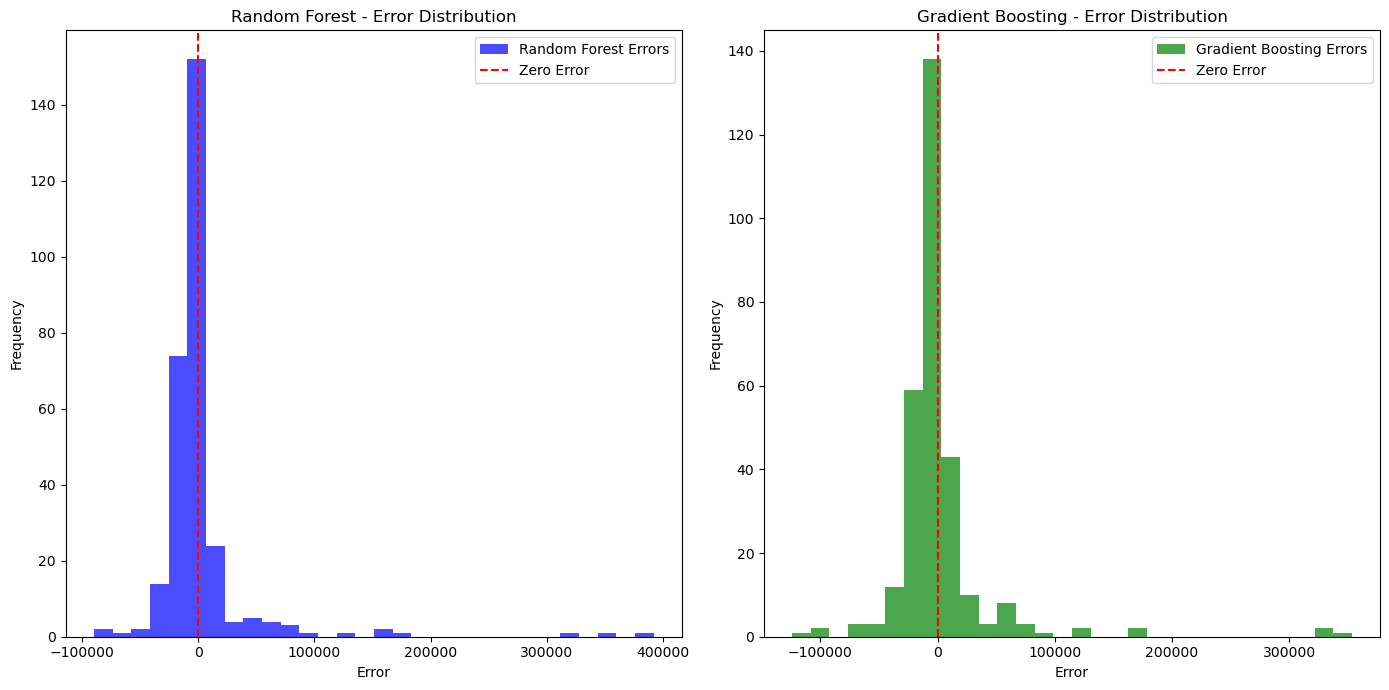

In [33]:
# 1. Error Distribution Plot for both models
plt.figure(figsize=(14, 7))

# Random Forest Error Distribution
plt.subplot(1, 2, 1)
rf_errors = y_test - rf_pred
plt.hist(rf_errors, bins=30, alpha=0.7, color='blue', label='Random Forest Errors')
plt.axvline(x=0, color='red', linestyle='--', label='Zero Error')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Random Forest - Error Distribution')
plt.legend()

# Gradient Boosting Error Distribution
plt.subplot(1, 2, 2)
gb_errors = y_test - gb_pred
plt.hist(gb_errors, bins=30, alpha=0.7, color='green', label='Gradient Boosting Errors')
plt.axvline(x=0, color='red', linestyle='--', label='Zero Error')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Gradient Boosting - Error Distribution')
plt.legend()

plt.tight_layout()
plt.show()

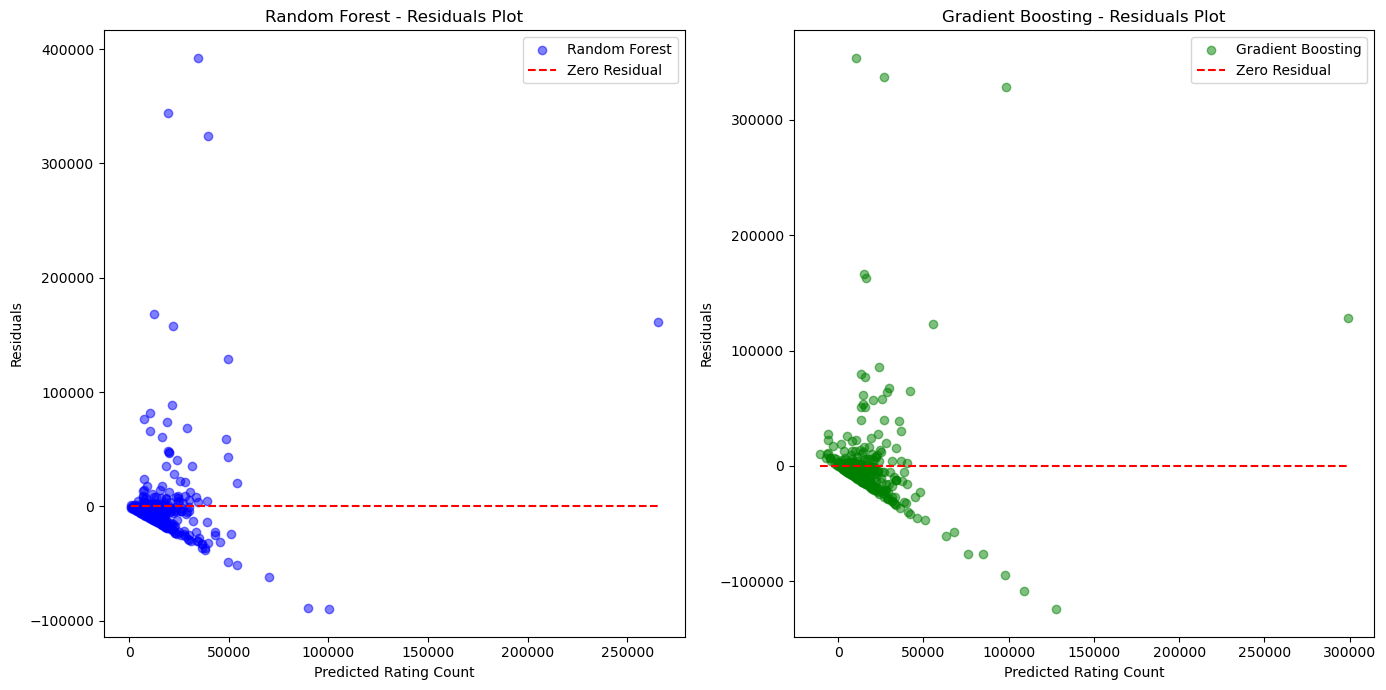

In [34]:
# 2. Residuals Plot for both models
plt.figure(figsize=(14, 7))

# Random Forest Residuals
plt.subplot(1, 2, 1)
plt.scatter(rf_pred, rf_errors, alpha=0.5, color='blue', label='Random Forest')
plt.hlines(0, rf_pred.min(), rf_pred.max(), colors='r', linestyle='--', label='Zero Residual')
plt.xlabel('Predicted Rating Count')
plt.ylabel('Residuals')
plt.title('Random Forest - Residuals Plot')
plt.legend()

# Gradient Boosting Residuals
plt.subplot(1, 2, 2)
plt.scatter(gb_pred, gb_errors, alpha=0.5, color='green', label='Gradient Boosting')
plt.hlines(0, gb_pred.min(), gb_pred.max(), colors='r', linestyle='--', label='Zero Residual')
plt.xlabel('Predicted Rating Count')
plt.ylabel('Residuals')
plt.title('Gradient Boosting - Residuals Plot')
plt.legend()

plt.tight_layout()
plt.show()

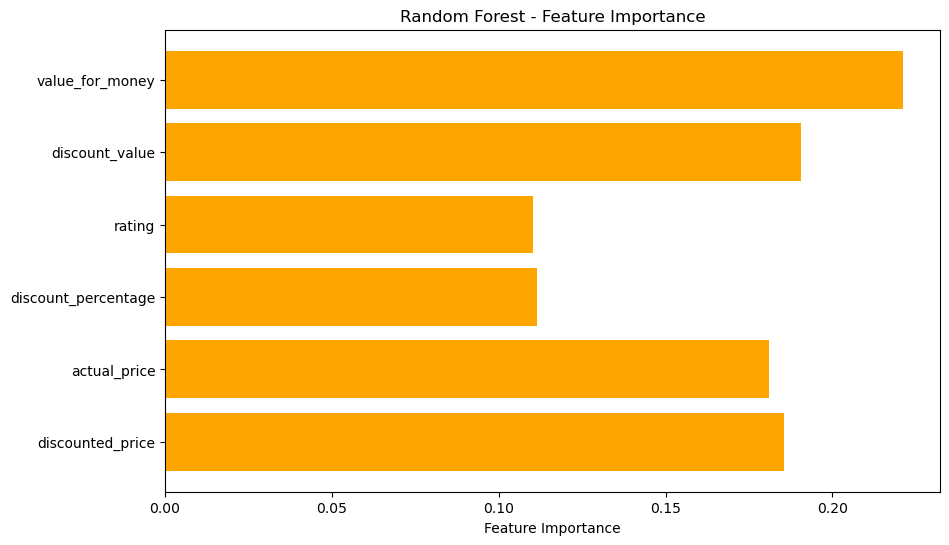

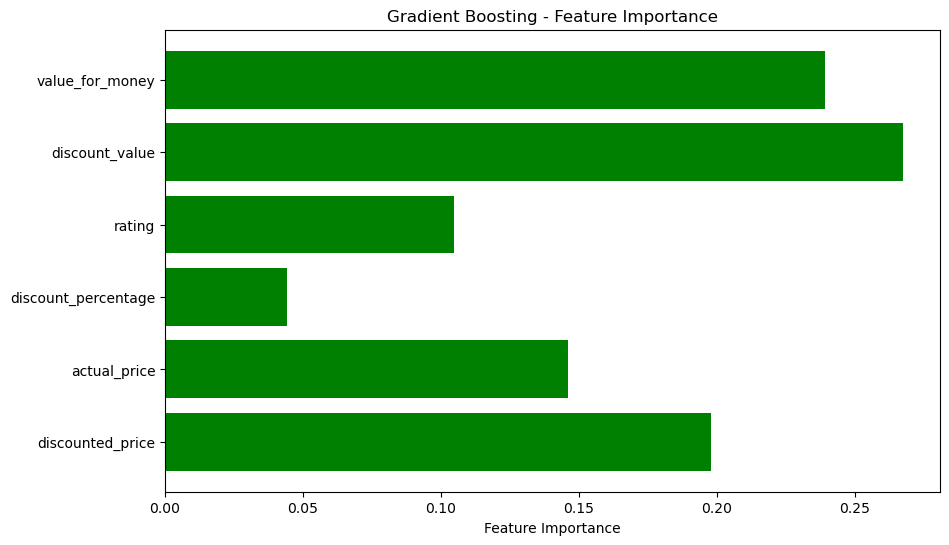

In [35]:
# 3. Feature Importance Plot (only for Random Forest)
rf_feature_importance = rf_model.feature_importances_
features_list = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features_list, rf_feature_importance, color='orange')
plt.xlabel('Feature Importance')
plt.title('Random Forest - Feature Importance')
plt.show()

# Gradient Boosting Feature Importance
gb_feature_importance = gb_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(features_list, gb_feature_importance, color='green')
plt.xlabel('Feature Importance')
plt.title('Gradient Boosting - Feature Importance')
plt.show()